In [1]:
import Function as F
import DefineFiles as D
import importlib
import tracking as tr
importlib.reload(F)
importlib.reload(D) 
importlib.reload(tr)
from Function import *
from DefineFiles import *
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import ruptures as rpt
import tracking as tr


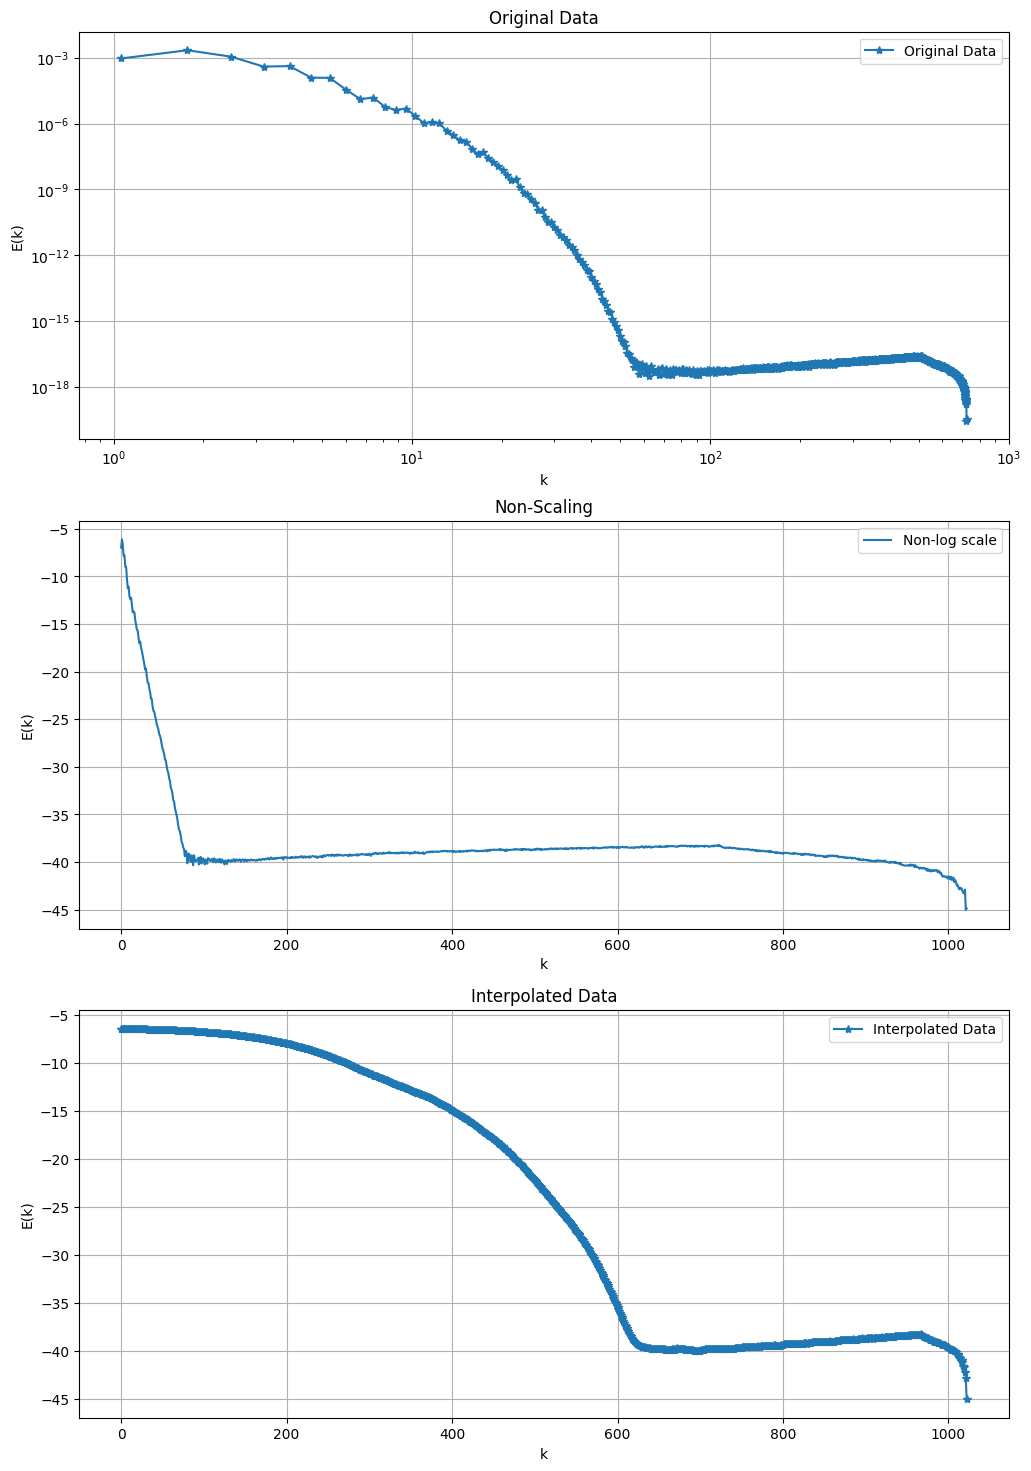

In [2]:
file = '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt'
k, ek = get_ek(file)
k = k[1:]
ek = ek[1:]

log_k = np.log(k)
log_E = np.log(ek)

window_length = 15
polyorder = 3
smoothed_log_E = savgol_filter(log_E, window_length, polyorder)

new_log_k = np.linspace(log_k.min(), log_k.max(), 1023)
interp_func = interp1d(log_k, smoothed_log_E, kind='linear', fill_value='extrapolate')
new_log_E = interp_func(new_log_k)
new_k = np.exp(new_log_k) 
new_E = np.exp(new_log_E)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Original Data
axes[0].loglog(k, ek, marker='*', label='Original Data')
axes[0].set_xlabel('k')
axes[0].set_ylabel('E(k)')
axes[0].set_title('Original Data')
axes[0].grid()
axes[0].legend()

# Interpolated Data
axes[2].plot(new_log_E, marker='*', label='Interpolated Data')
axes[2].set_xlabel('k')
axes[2].set_ylabel('E(k)')
axes[2].set_title('Interpolated Data')
axes[2].grid()
axes[2].legend()

# Non-log scale
axes[1].plot(log_E, label='Non-log scale')
axes[1].set_xlabel('k')
axes[1].set_ylabel('E(k)')
axes[1].set_title('Non-Scaling')
axes[1].grid()
axes[1].legend()

plt.show()

### Tracking ###

Tracking 1
Found segments:
Segment 1: indices 0 to 5, k from 1.06e+00 to 3.89e+00
Segment 2: indices 5 to 15, k from 4.60e+00 to 1.10e+01
Segment 3: indices 15 to 30, k from 1.17e+01 to 2.16e+01
Segment 4: indices 30 to 50, k from 2.23e+01 to 3.57e+01
Segment 5: indices 50 to 75, k from 3.64e+01 to 5.34e+01
Segment 6: indices 75 to 105, k from 5.41e+01 to 7.46e+01
Segment 7: indices 105 to 135, k from 7.53e+01 to 9.58e+01
Segment 8: indices 135 to 180, k from 9.65e+01 to 1.28e+02
Segment 9: indices 180 to 220, k from 1.28e+02 to 1.56e+02
Segment 10: indices 220 to 280, k from 1.57e+02 to 1.98e+02
Segment 11: indices 280 to 345, k from 1.99e+02 to 2.44e+02
Segment 12: indices 345 to 395, k from 2.45e+02 to 2.80e+02
Segment 13: indices 395 to 445, k from 2.80e+02 to 3.15e+02
Segment 14: indices 445 to 470, k from 3.16e+02 to 3.33e+02
Segment 15: indices 470 to 505, k from 3.33e+02 to 3.57e+02
Segment 16: indices 505 to 545, k from 3.58e+02 to 3.86e+02
Segment 17: indices 545 to 635, k fr

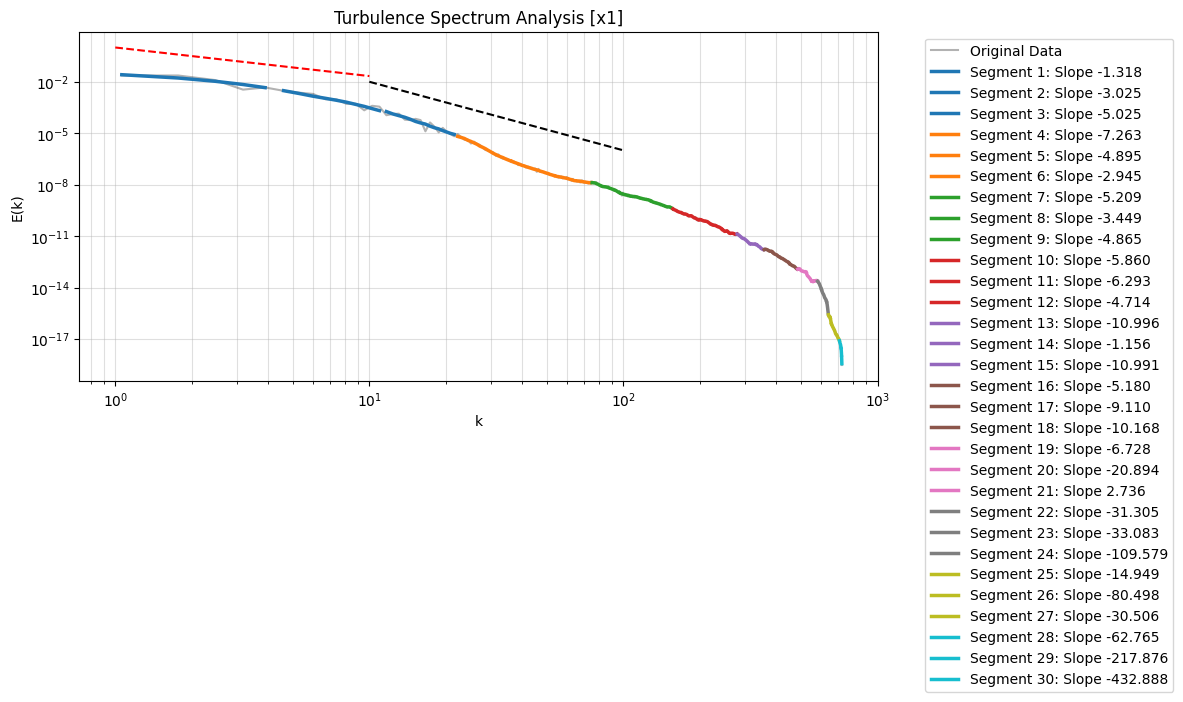

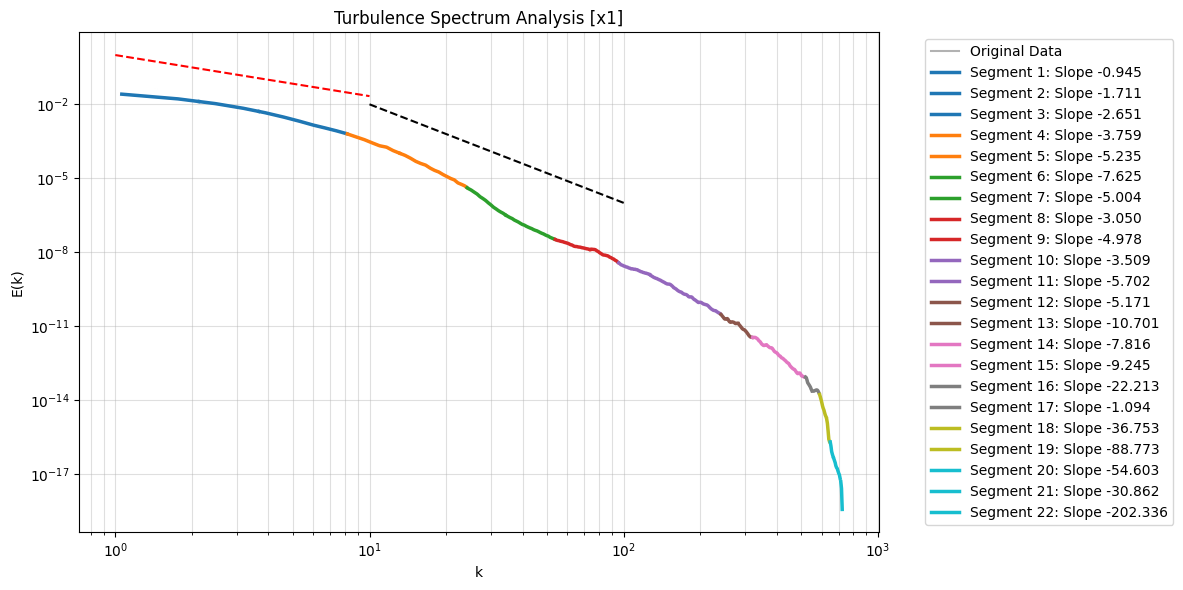

In [19]:
file = '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt'
print('Tracking 1')
tr.tracking(file, 0.1, 'x1')
compared_line()
print('Tracking 2')
tr.tracking2(file, 0.1, 'x1')
compared_line()


### Averaged across time ###

In [6]:
all_ek = []

for file in files:
    k, e_k = get_ek(file)
    e_k = e_k[1:]
    all_ek.append(e_k)

k = k[1:]
all_ek = np.array(all_ek)
mean_ek = np.mean(all_ek, axis=0)

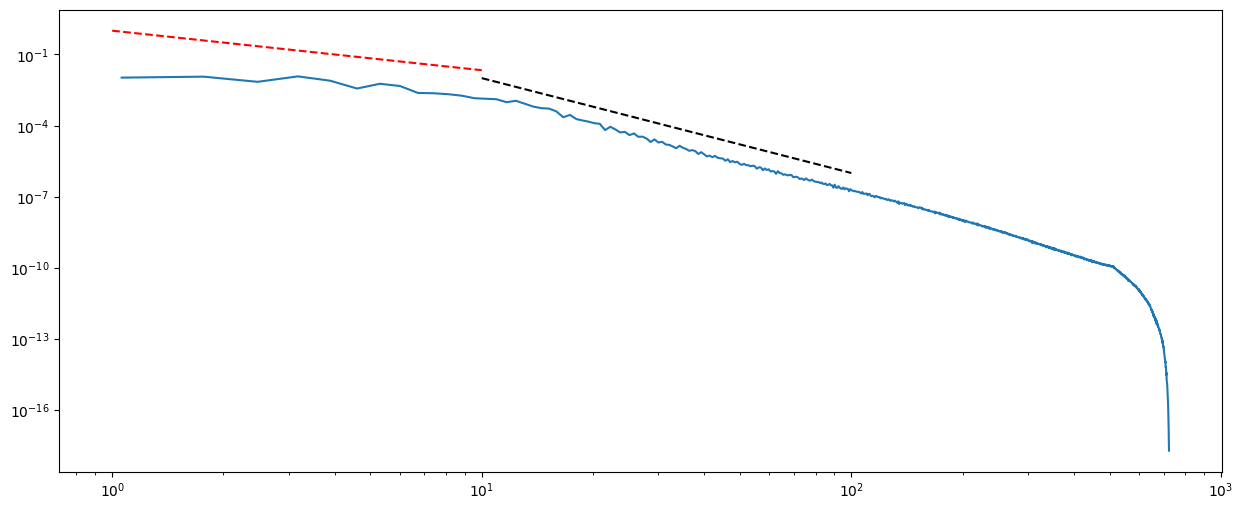

In [7]:
plt.figure(figsize=(15, 6))
plt.loglog(k,mean_ek)
compared_line()

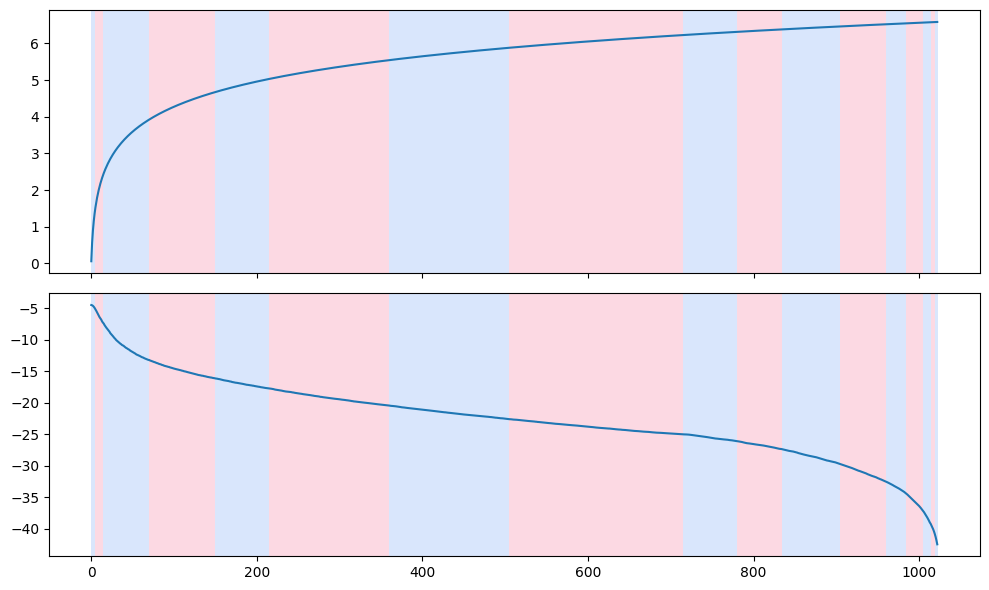

Found segments:
Segment 1: indices 0 to 5, k from 1.06e+00 to 3.89e+00
Segment 2: indices 5 to 15, k from 4.60e+00 to 1.10e+01
Segment 3: indices 15 to 70, k from 1.17e+01 to 4.99e+01
Segment 4: indices 70 to 150, k from 5.06e+01 to 1.06e+02
Segment 5: indices 150 to 215, k from 1.07e+02 to 1.52e+02
Segment 6: indices 215 to 360, k from 1.53e+02 to 2.55e+02
Segment 7: indices 360 to 505, k from 2.56e+02 to 3.57e+02
Segment 8: indices 505 to 715, k from 3.58e+02 to 5.06e+02
Segment 9: indices 715 to 780, k from 5.07e+02 to 5.52e+02
Segment 10: indices 780 to 835, k from 5.53e+02 to 5.91e+02
Segment 11: indices 835 to 905, k from 5.92e+02 to 6.40e+02
Segment 12: indices 905 to 960, k from 6.41e+02 to 6.79e+02
Segment 13: indices 960 to 985, k from 6.80e+02 to 6.97e+02
Segment 14: indices 985 to 1005, k from 6.98e+02 to 7.11e+02
Segment 15: indices 1005 to 1015, k from 7.12e+02 to 7.18e+02
Segment 16: indices 1015 to 1020, k from 7.19e+02 to 7.22e+02
Segment 17: indices 1020 to 1023, k fr

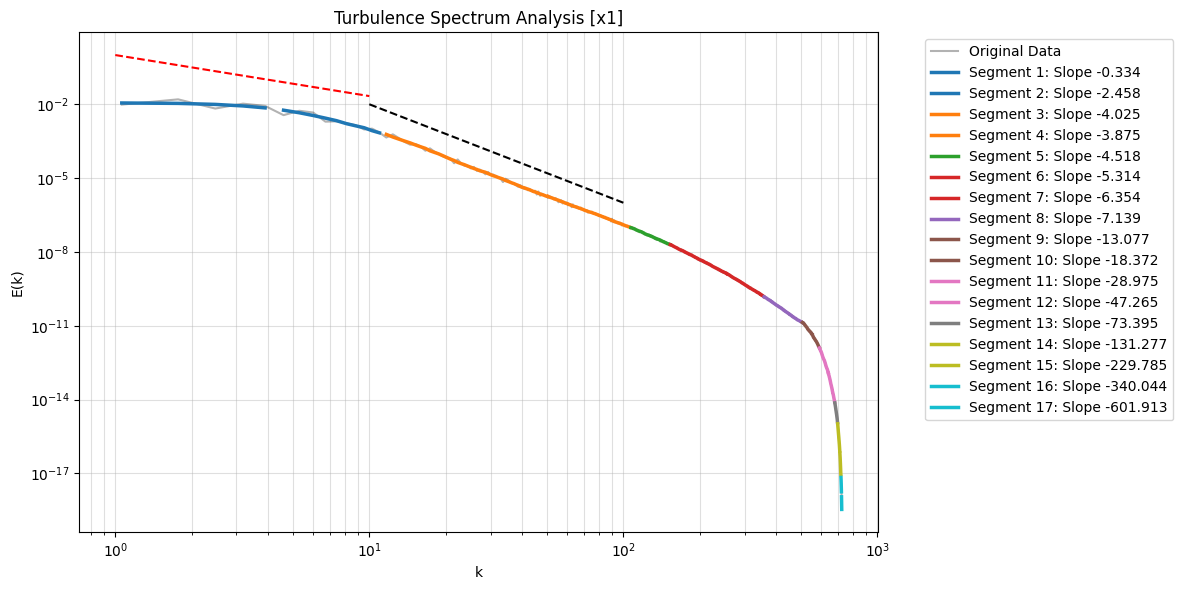

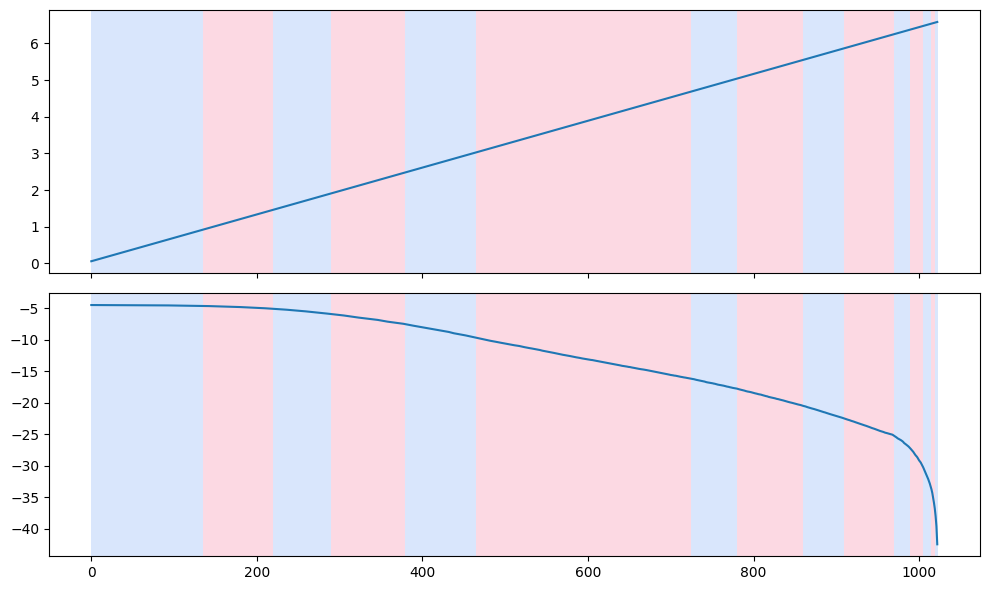

Found segments:
Segment 1: indices 0 to 135, k from 1.06e+00 to 2.50e+00
Segment 2: indices 135 to 220, k from 2.51e+00 to 4.29e+00
Segment 3: indices 220 to 290, k from 4.32e+00 to 6.71e+00
Segment 4: indices 290 to 380, k from 6.76e+00 to 1.19e+01
Segment 5: indices 380 to 465, k from 1.20e+01 to 2.05e+01
Segment 6: indices 465 to 725, k from 2.07e+01 to 1.08e+02
Segment 7: indices 725 to 780, k from 1.09e+02 to 1.53e+02
Segment 8: indices 780 to 860, k from 1.54e+02 to 2.56e+02
Segment 9: indices 860 to 910, k from 2.57e+02 to 3.52e+02
Segment 10: indices 910 to 970, k from 3.54e+02 to 5.16e+02
Segment 11: indices 970 to 990, k from 5.19e+02 to 5.86e+02
Segment 12: indices 990 to 1005, k from 5.90e+02 to 6.45e+02
Segment 13: indices 1005 to 1015, k from 6.49e+02 to 6.88e+02
Segment 14: indices 1015 to 1020, k from 6.92e+02 to 7.10e+02
Segment 15: indices 1020 to 1023, k from 7.15e+02 to 7.24e+02


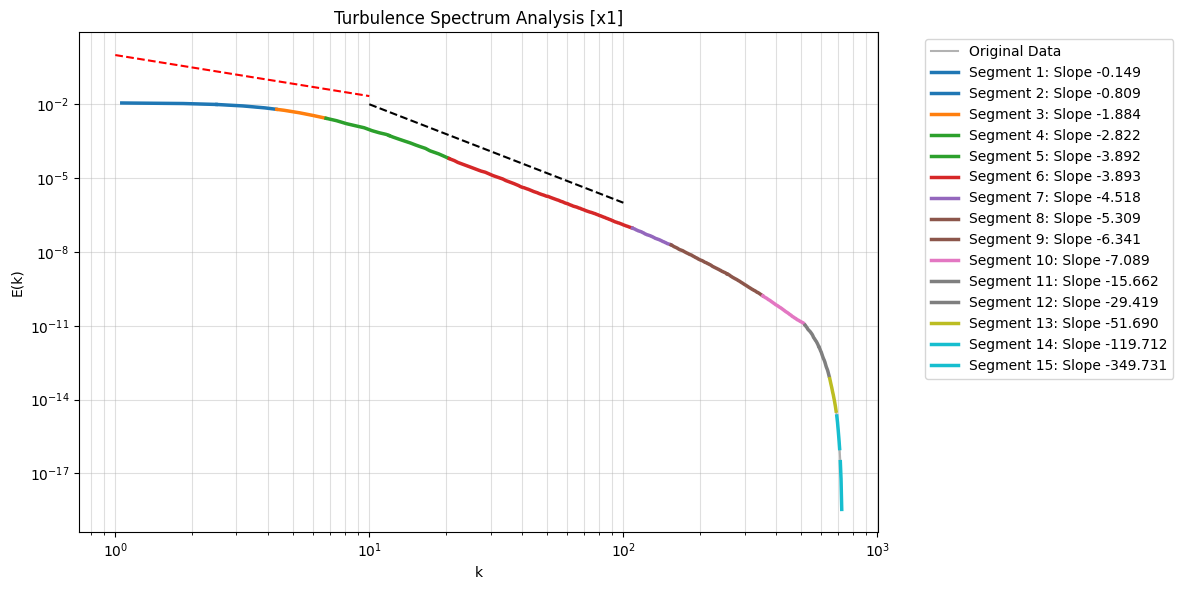

In [18]:
tr.tracking_data(k, mean_ek, 0.1, 'x1')
compared_line()
tr.tracking2_data(k, mean_ek, 0.1, 'x1')
compared_line()

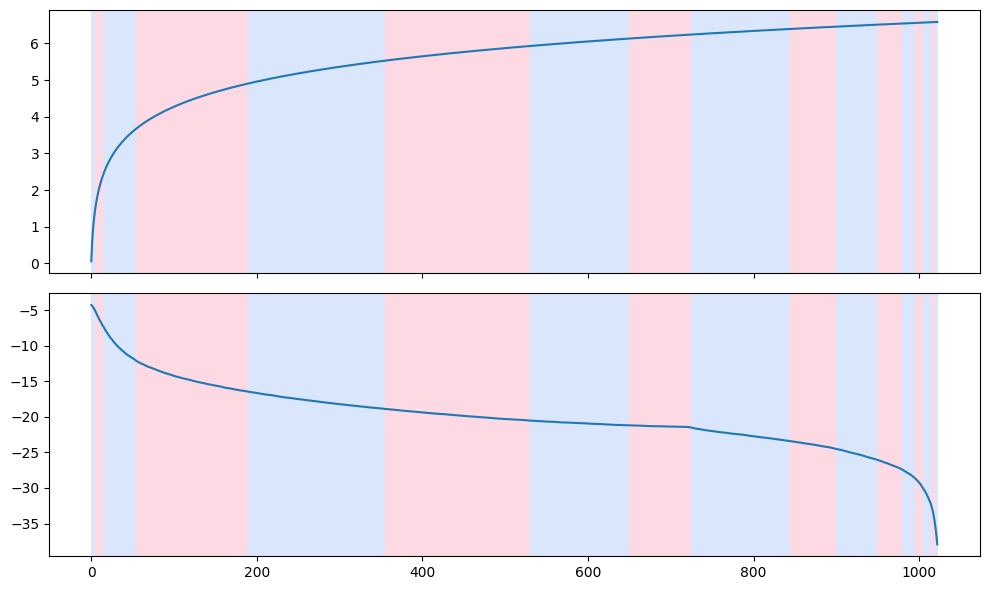

Found segments:
Segment 1: indices 0 to 5, k from 1.06e+00 to 3.89e+00
Segment 2: indices 5 to 15, k from 4.60e+00 to 1.10e+01
Segment 3: indices 15 to 55, k from 1.17e+01 to 3.92e+01
Segment 4: indices 55 to 190, k from 4.00e+01 to 1.35e+02
Segment 5: indices 190 to 355, k from 1.35e+02 to 2.51e+02
Segment 6: indices 355 to 530, k from 2.52e+02 to 3.75e+02
Segment 7: indices 530 to 650, k from 3.76e+02 to 4.60e+02
Segment 8: indices 650 to 725, k from 4.61e+02 to 5.13e+02
Segment 9: indices 725 to 845, k from 5.14e+02 to 5.98e+02
Segment 10: indices 845 to 900, k from 5.99e+02 to 6.37e+02
Segment 11: indices 900 to 950, k from 6.37e+02 to 6.72e+02
Segment 12: indices 950 to 980, k from 6.73e+02 to 6.93e+02
Segment 13: indices 980 to 995, k from 6.94e+02 to 7.04e+02
Segment 14: indices 995 to 1005, k from 7.05e+02 to 7.11e+02
Segment 15: indices 1005 to 1015, k from 7.12e+02 to 7.18e+02
Segment 16: indices 1015 to 1020, k from 7.19e+02 to 7.22e+02
Segment 17: indices 1020 to 1023, k fr

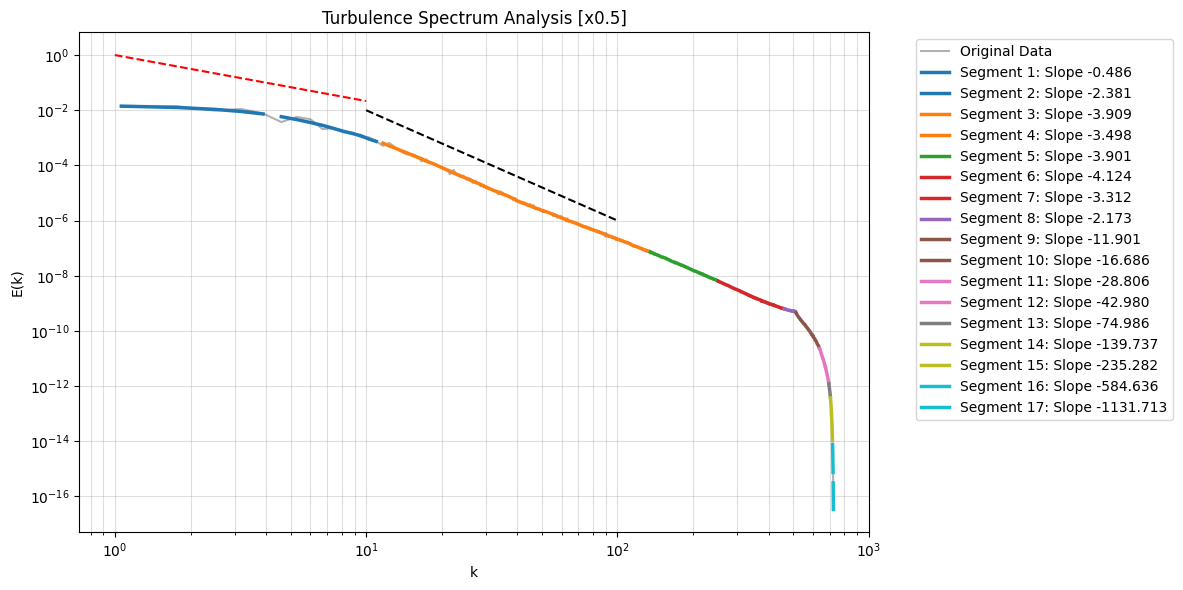

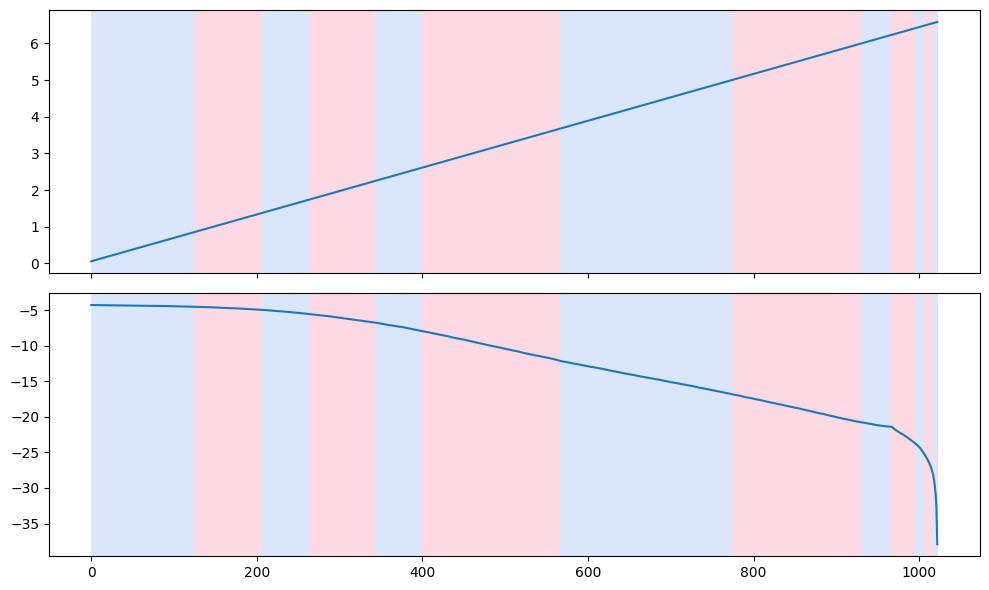

Found segments:
Segment 1: indices 0 to 125, k from 1.06e+00 to 2.34e+00
Segment 2: indices 125 to 205, k from 2.36e+00 to 3.90e+00
Segment 3: indices 205 to 265, k from 3.93e+00 to 5.72e+00
Segment 4: indices 265 to 345, k from 5.76e+00 to 9.54e+00
Segment 5: indices 345 to 400, k from 9.60e+00 to 1.36e+01
Segment 6: indices 400 to 565, k from 1.36e+01 to 3.89e+01
Segment 7: indices 565 to 775, k from 3.91e+01 to 1.49e+02
Segment 8: indices 775 to 930, k from 1.50e+02 to 4.00e+02
Segment 9: indices 930 to 965, k from 4.02e+02 to 5.00e+02
Segment 10: indices 965 to 995, k from 5.03e+02 to 6.05e+02
Segment 11: indices 995 to 1005, k from 6.09e+02 to 6.45e+02
Segment 12: indices 1005 to 1015, k from 6.49e+02 to 6.88e+02
Segment 13: indices 1015 to 1020, k from 6.92e+02 to 7.10e+02
Segment 14: indices 1020 to 1023, k from 7.15e+02 to 7.24e+02


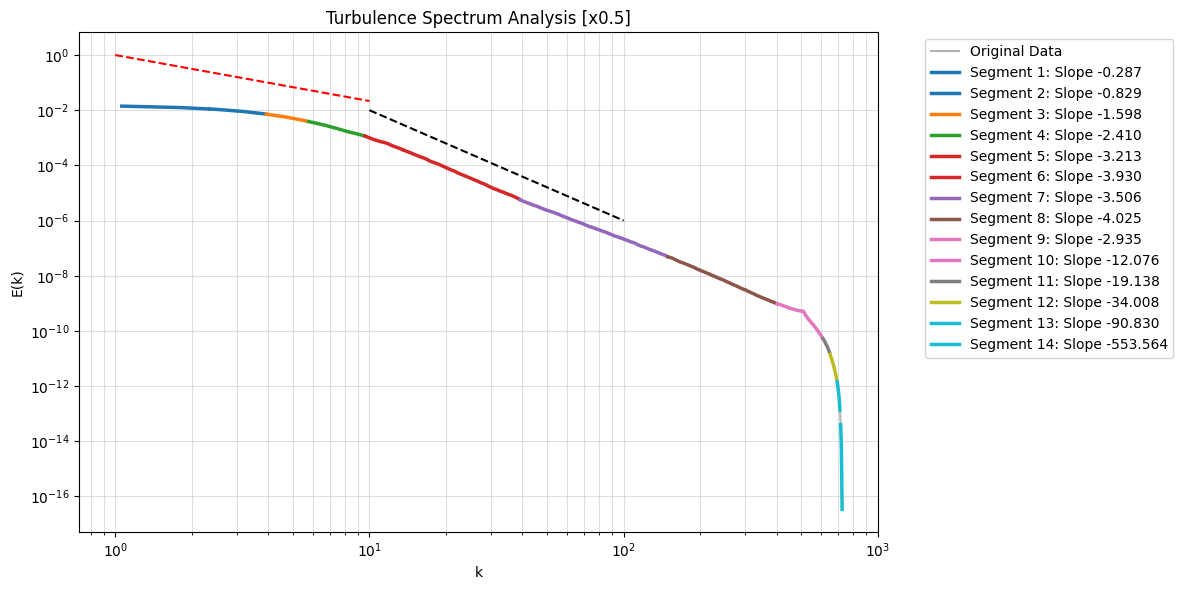

In [11]:
all_ek = []

for file in files3:
    k, e_k = get_ek(file)
    e_k = e_k[1:]
    all_ek.append(e_k)

k = k[1:]
all_ek = np.array(all_ek)
mean_ek = np.mean(all_ek, axis=0)

tr.tracking_data(k, mean_ek, 0.05, 'x0.5')
compared_line()
tr.tracking2_data(k, mean_ek, 0.05, 'x0.5')
compared_line()


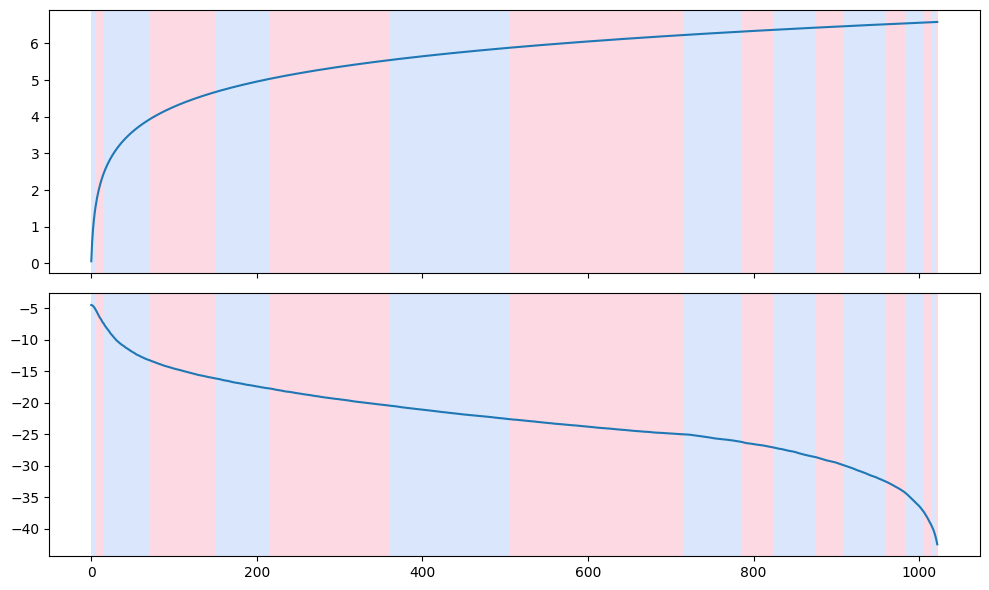

Found segments:
Segment 1: indices 0 to 5, k from 1.06e+00 to 3.89e+00
Segment 2: indices 5 to 15, k from 4.60e+00 to 1.10e+01
Segment 3: indices 15 to 70, k from 1.17e+01 to 4.99e+01
Segment 4: indices 70 to 150, k from 5.06e+01 to 1.06e+02
Segment 5: indices 150 to 215, k from 1.07e+02 to 1.52e+02
Segment 6: indices 215 to 360, k from 1.53e+02 to 2.55e+02
Segment 7: indices 360 to 505, k from 2.56e+02 to 3.57e+02
Segment 8: indices 505 to 715, k from 3.58e+02 to 5.06e+02
Segment 9: indices 715 to 785, k from 5.07e+02 to 5.55e+02
Segment 10: indices 785 to 825, k from 5.56e+02 to 5.84e+02
Segment 11: indices 825 to 875, k from 5.84e+02 to 6.19e+02
Segment 12: indices 875 to 910, k from 6.20e+02 to 6.44e+02
Segment 13: indices 910 to 960, k from 6.45e+02 to 6.79e+02
Segment 14: indices 960 to 985, k from 6.80e+02 to 6.97e+02
Segment 15: indices 985 to 1005, k from 6.98e+02 to 7.11e+02
Segment 16: indices 1005 to 1015, k from 7.12e+02 to 7.18e+02
Segment 17: indices 1015 to 1020, k from

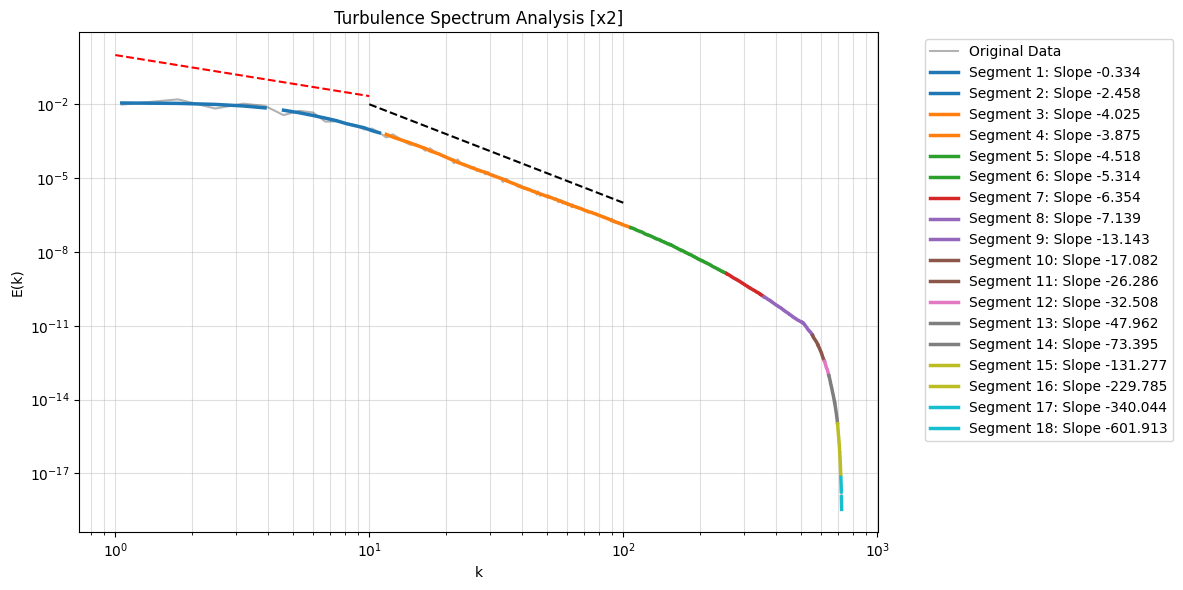

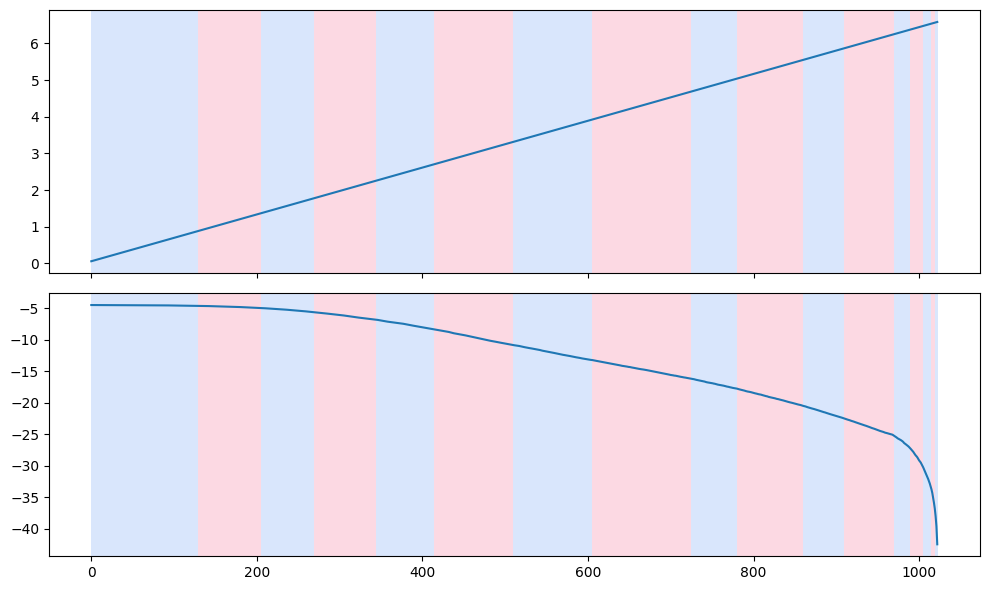

Found segments:
Segment 1: indices 0 to 130, k from 1.06e+00 to 2.42e+00
Segment 2: indices 130 to 205, k from 2.43e+00 to 3.90e+00
Segment 3: indices 205 to 270, k from 3.93e+00 to 5.91e+00
Segment 4: indices 270 to 345, k from 5.95e+00 to 9.54e+00
Segment 5: indices 345 to 415, k from 9.60e+00 to 1.49e+01
Segment 6: indices 415 to 510, k from 1.50e+01 to 2.74e+01
Segment 7: indices 510 to 605, k from 2.75e+01 to 5.02e+01
Segment 8: indices 605 to 725, k from 5.05e+01 to 1.08e+02
Segment 9: indices 725 to 780, k from 1.09e+02 to 1.53e+02
Segment 10: indices 780 to 860, k from 1.54e+02 to 2.56e+02
Segment 11: indices 860 to 910, k from 2.57e+02 to 3.52e+02
Segment 12: indices 910 to 970, k from 3.54e+02 to 5.16e+02
Segment 13: indices 970 to 990, k from 5.19e+02 to 5.86e+02
Segment 14: indices 990 to 1005, k from 5.90e+02 to 6.45e+02
Segment 15: indices 1005 to 1015, k from 6.49e+02 to 6.88e+02
Segment 16: indices 1015 to 1020, k from 6.92e+02 to 7.10e+02
Segment 17: indices 1020 to 10

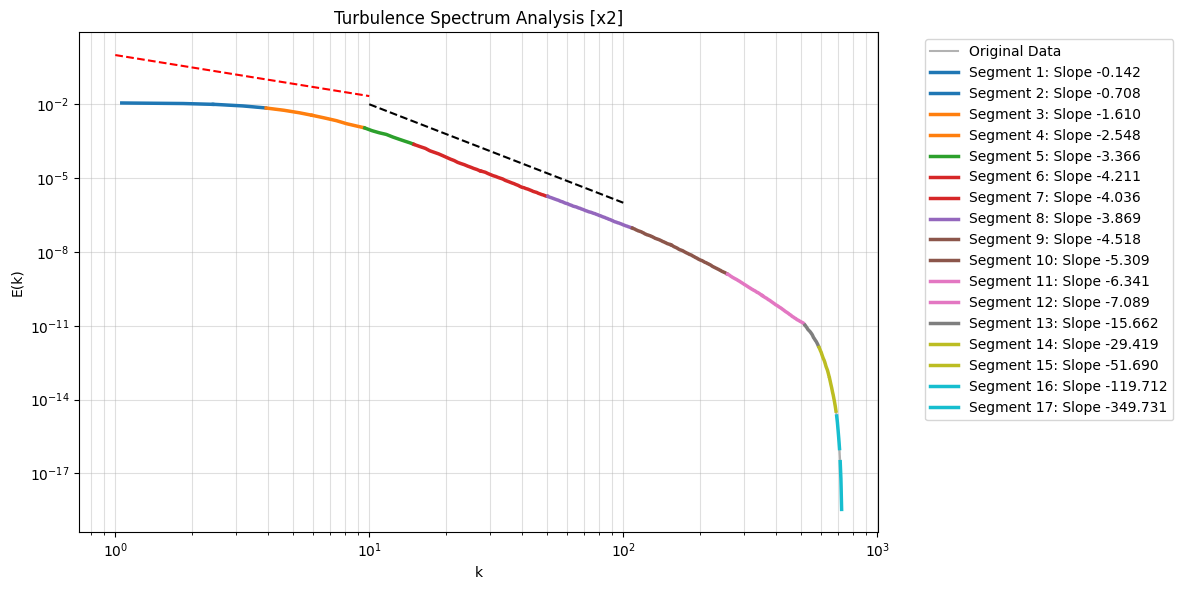

In [14]:
all_ek = []

for file in files4:
    k, e_k = get_ek(file)
    e_k = e_k[1:]
    all_ek.append(e_k)

k = k[1:]
all_ek = np.array(all_ek)
mean_ek = np.mean(all_ek, axis=0)

tr.tracking_data(k, mean_ek, 0.05, 'x2')
compared_line()
tr.tracking2_data(k, mean_ek, 0.05, 'x2')
compared_line()


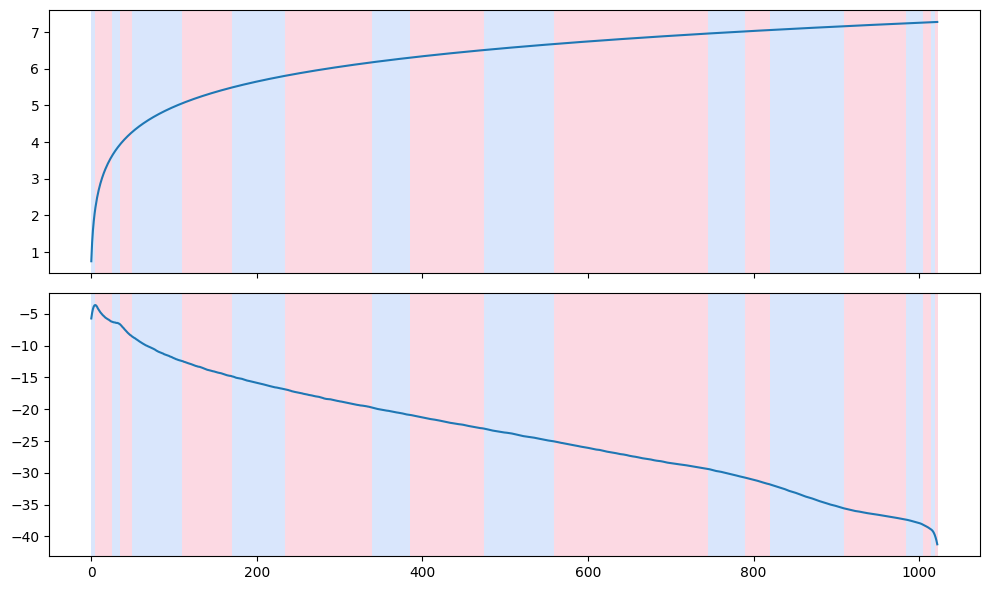

Found segments:
Segment 1: indices 0 to 5, k from 2.12e+00 to 7.78e+00
Segment 2: indices 5 to 25, k from 9.19e+00 to 3.61e+01
Segment 3: indices 25 to 35, k from 3.75e+01 to 5.02e+01
Segment 4: indices 35 to 50, k from 5.16e+01 to 7.14e+01
Segment 5: indices 50 to 110, k from 7.28e+01 to 1.56e+02
Segment 6: indices 110 to 170, k from 1.58e+02 to 2.41e+02
Segment 7: indices 170 to 235, k from 2.43e+02 to 3.33e+02
Segment 8: indices 235 to 340, k from 3.34e+02 to 4.82e+02
Segment 9: indices 340 to 385, k from 4.83e+02 to 5.45e+02
Segment 10: indices 385 to 475, k from 5.47e+02 to 6.72e+02
Segment 11: indices 475 to 560, k from 6.74e+02 to 7.93e+02
Segment 12: indices 560 to 745, k from 7.94e+02 to 1.05e+03
Segment 13: indices 745 to 790, k from 1.06e+03 to 1.12e+03
Segment 14: indices 790 to 820, k from 1.12e+03 to 1.16e+03
Segment 15: indices 820 to 910, k from 1.16e+03 to 1.29e+03
Segment 16: indices 910 to 985, k from 1.29e+03 to 1.39e+03
Segment 17: indices 985 to 1005, k from 1.40e

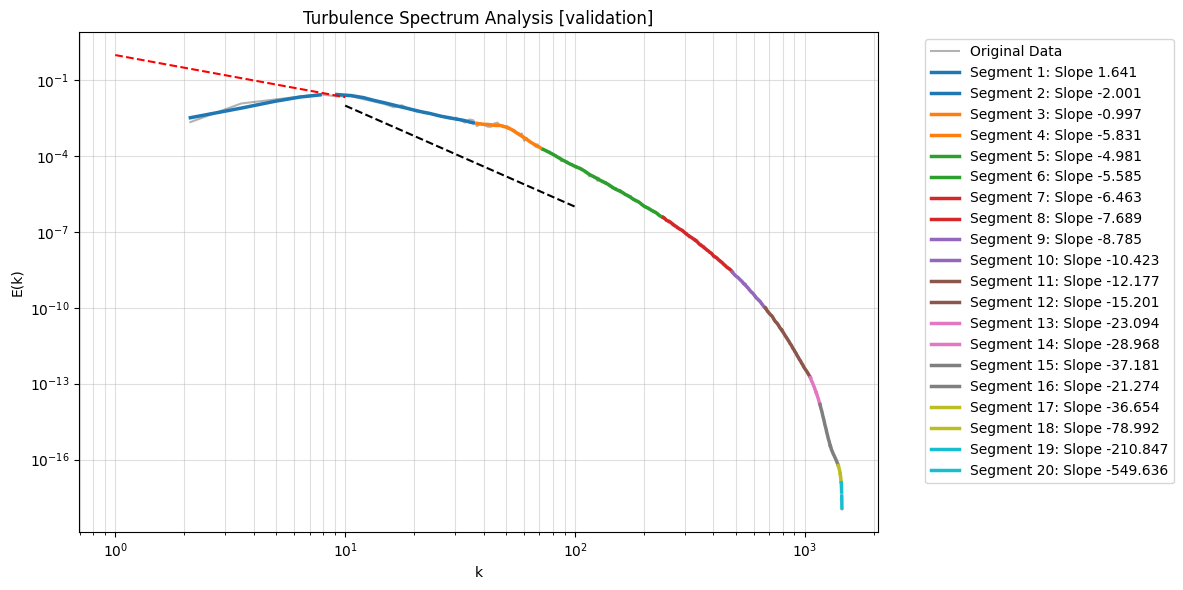

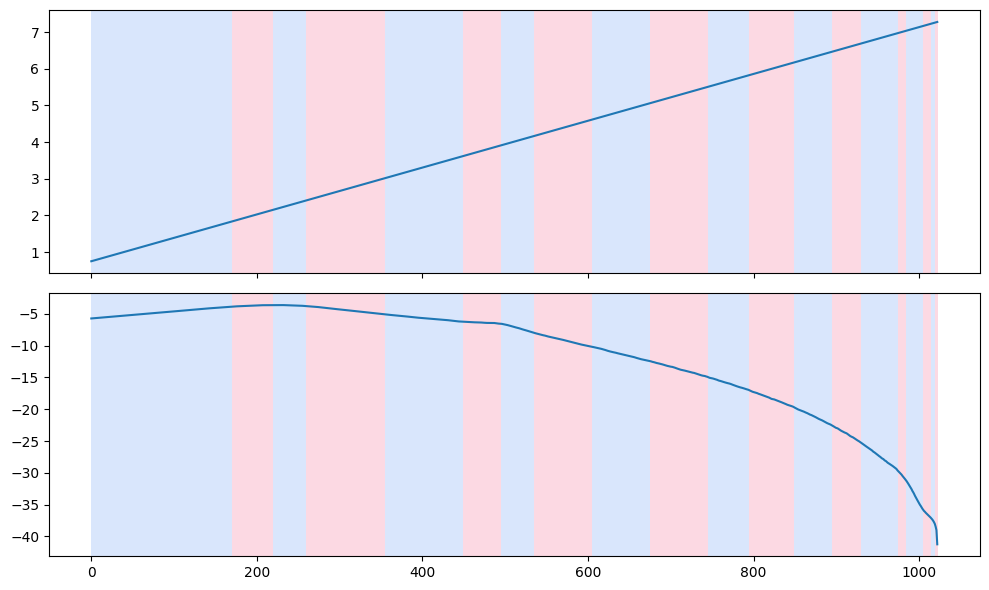

Found segments:
Segment 1: indices 0 to 170, k from 2.12e+00 to 6.24e+00
Segment 2: indices 170 to 220, k from 6.28e+00 to 8.59e+00
Segment 3: indices 220 to 260, k from 8.64e+00 to 1.11e+01
Segment 4: indices 260 to 355, k from 1.12e+01 to 2.03e+01
Segment 5: indices 355 to 450, k from 2.05e+01 to 3.73e+01
Segment 6: indices 450 to 495, k from 3.75e+01 to 4.97e+01
Segment 7: indices 495 to 535, k from 5.00e+01 to 6.42e+01
Segment 8: indices 535 to 605, k from 6.46e+01 to 1.00e+02
Segment 9: indices 605 to 675, k from 1.01e+02 to 1.57e+02
Segment 10: indices 675 to 745, k from 1.58e+02 to 2.45e+02
Segment 11: indices 745 to 795, k from 2.47e+02 to 3.38e+02
Segment 12: indices 795 to 850, k from 3.40e+02 to 4.80e+02
Segment 13: indices 850 to 895, k from 4.83e+02 to 6.39e+02
Segment 14: indices 895 to 930, k from 6.43e+02 to 7.99e+02
Segment 15: indices 930 to 975, k from 8.04e+02 to 1.07e+03
Segment 16: indices 975 to 985, k from 1.07e+03 to 1.14e+03
Segment 17: indices 985 to 1005, k 

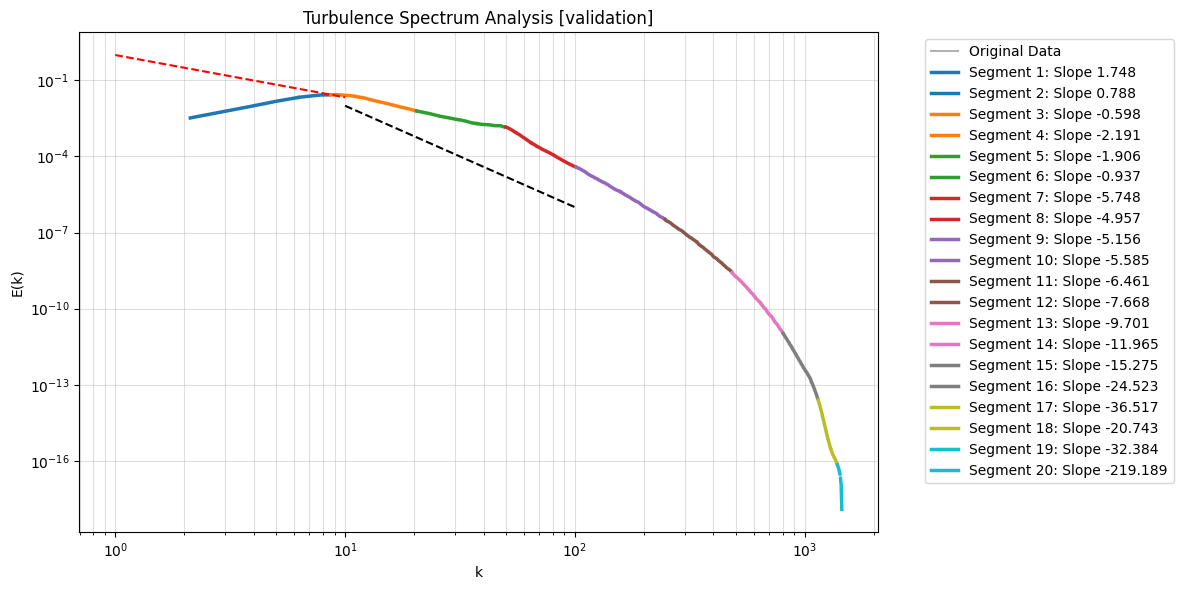

In [2]:
all_ek = []

for file in files5:
    k, e_k = get_ek(file)
    e_k = e_k[1:]
    all_ek.append(e_k)

k = k[1:]
all_ek = np.array(all_ek)
mean_ek = np.mean(all_ek, axis=0)

tr.tracking_data(k, mean_ek, 0.05, 'validation')
compared_line()
tr.tracking2_data(k, mean_ek, 0.05, 'validation')
compared_line()
